In [219]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [220]:
data = pd.read_csv("Admission_Predict.csv")  # Import dataset

In [221]:
# Display top 5 rows

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [222]:
# Display last 5 rows

data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [223]:
# Shape of our dataset

data.shape

(400, 9)

In [224]:
# Get information about our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [225]:
# Check null values

data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [226]:
# Get overall statistics about our dataset

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [227]:
data = data.drop("Serial No.",axis=1) # Dropping Serial No

In [228]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

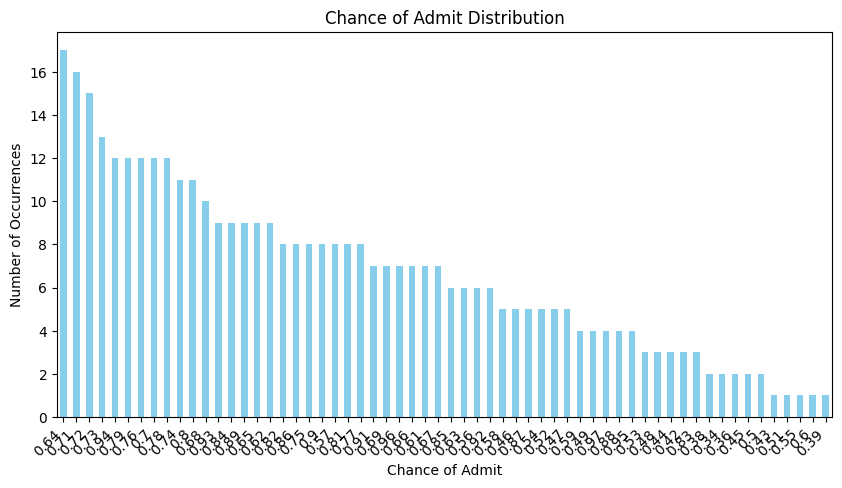

In [229]:
# Visualize the target variable
data['Chance of Admit '].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Chance of Admit Distribution")
plt.ylabel('Number of Occurrences')
plt.xlabel('Chance of Admit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

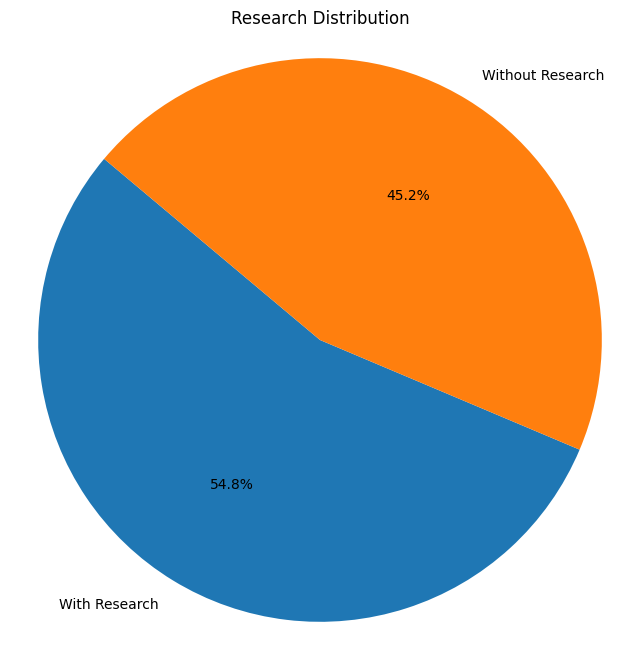

In [230]:
labels = ['With Research', 'Without Research']
sizes = data['Research'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Research Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [231]:
# Store the feature matrix X and response vector y

x=data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

In [232]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [233]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [234]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

In [235]:
# Splitting the dataset into training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [236]:
# Standardizing the data
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [237]:
# Converting y_train and y_test into 1D array
y_train = [ 1 if value >0.8 else 0 for value in y_train]
y_test = [ 1 if value >0.8 else 0 for value in y_test]

y_train =np.array(y_train)
y_test =np.array(y_test)

In [238]:
# Training the model
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
 

KNeighborsClassifier()

In [239]:
y_pred1=knn.predict(x_test)   #predicting on test data

In [240]:
print(accuracy_score(y_test,y_pred1))  #checking accuracy

0.8875
